Frames per second using video.get(cv2.CAP_PROP_FPS) : 9


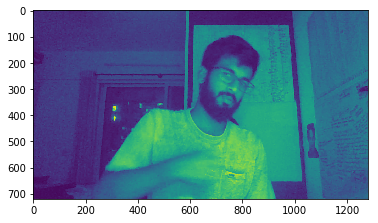

In [3]:
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
from PIL import Image, ImageOps
import time
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model, load_model
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import cv2
import numpy as np
import argparse
import os
import csv
import time
from random import randint
IMG_SIZE=50
model = load_model(r'C:\Users\Jairaj Pisupati\AppData\Roaming\SPB_16.6\model2.h5')

def add_border(input_image, output_image, border, color=0):
    img = Image.open(input_image)

    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill=color)
    else:
        raise RuntimeError('Border is not an integer or tuple!')

    bimg.save(output_image)

list=os.listdir('C://Users//Jairaj Pisupati//AppData//Roaming//SPB_16.6//Gods_Classification//videos')

for video_name in list:
    video_file_name=video_name.split('.')[-2]
    path="C:\\Users\\Jairaj Pisupati\\AppData\\Roaming\\SPB_16.6\\Gods_Classification\\extracted_frames\\violent"
    cap = cv2.VideoCapture('videos/'+video_name)
    #Find FPS
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
    if int(major_ver) < 3:
        fps = int(cap.get(cv2.cv.CV_CAP_PROP_FPS))
        print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    else:
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

    i=0
    j=0
    final_fps=4
    block=1
    selected_frames=[]
    while (len(selected_frames)<final_fps):
        r=randint(1,fps)
        if r not in selected_frames:
            selected_frames.append(r)
    selected_frames.sort()

    def update_frames(lb,ub):
        selected_frames=[]
        while (len(selected_frames) < final_fps):
            r = randint(lb, ub)
            if r not in selected_frames:
                selected_frames.append(r)
        selected_frames.sort()
        return selected_frames

    v_name=video_name.split('.')
    v=v_name[0]

    while(cap.isOpened()):
        if j == final_fps:
            lb = fps * block
            ub = fps * (block + 1)
            selected_frames = update_frames(lb, ub)
            j = 0
            block += 1
        ret, frame = cap.read()
        if ret == False:
            break
        fname = v + '-frame' + str(i) + '.jpg'
        if i in selected_frames:
            cv2.imwrite('C:/Users/Jairaj Pisupati/AppData/Roaming/SPB_16.6/Gods_Classification/God/Integrated/'+fname,frame)
            img_path = r'C:/Users/Jairaj Pisupati/AppData/Roaming/SPB_16.6/Gods_Classification/God/Integrated/'+fname
            img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
            plt.imshow(img)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            pred = model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 1))
            if pred[0][0] > pred[0][1]:
                cv2.imwrite('C:/Users/Jairaj Pisupati/AppData/Roaming/SPB_16.6/Gods_Classification/God/Integrated/'+fname,frame)
                in_img = 'C:/Users/Jairaj Pisupati/AppData/Roaming/SPB_16.6/Gods_Classification/God/Integrated/'+fname
                output_img = in_img +"_classified.jpg"
                add_border(in_img,output_img,border=100,color='green')
                os.remove(in_img)
            else:
                cv2.imwrite('C:/Users/Jairaj Pisupati/AppData/Roaming/SPB_16.6/Gods_Classification/God/Integrated/'+fname,frame)
                in_img = 'C:/Users/Jairaj Pisupati/AppData/Roaming/SPB_16.6/Gods_Classification/God/Integrated/'+fname
                output_img = in_img +"_classified.jpg"
                add_border(in_img,output_img,border=100,color='red')
                os.remove(in_img)
            j += 1
        i += 1

    cap.release()
    cv2.destroyAllWindows()